In [1]:
# to import necessary libraries

import pandas as pd
import numpy as np
import os
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# to check csv files in data folder

folder = os.path.abspath('data')
files = os.listdir(folder)
files

['Software Professionals Salaries.csv',
 'startup_funding2019.csv',
 'startup_funding2020.csv',
 'startup_funding2021.csv']

In [3]:
# to load all three csv files in a dataframe called 'fnd' adding a new column named Year that includes the year of the csv file

# to create an empty dataframe

fnd = pd.DataFrame()

# to load all three files

for file in files:
    if file[:7] == 'startup':
        df_tmp = pd.read_csv(f'{folder}/{file}')
        df_tmp['Year'] = file[-8:-4]
        fnd = pd.concat([fnd, df_tmp])

# to reset index of the new dataframe

fnd.reset_index(inplace=True, drop=True)

# to check its shape

print(f'fnd rows: {fnd.shape[0]} | fnd cols: {fnd.shape[1]}\n')

# to check cols dtype and null

fnd.info()

fnd rows: 2343 | fnd cols: 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   object
dtypes: object(10)
memory usage: 183.2+ KB


In [8]:
# to convert 'Year' to integer

fnd['Year'] = pd.to_numeric(fnd['Year'])


In [9]:
# to convert 'Amount($)' to nullable integer

fnd['Amount($)'] = fnd['Amount($)'].str.replace('$', '', regex=False)
fnd['Amount($)'] = fnd['Amount($)'].str.replace(',', '', regex=False)
fnd['Amount($)'] = fnd['Amount($)'].str.replace('.', '', regex=False)
fnd['Amount($)'] = fnd['Amount($)'].replace('Undisclosed', np.NaN, regex=False)
fnd['Amount($)'] = fnd['Amount($)'].astype('Int64')

In [10]:
# to convert 'Founded' to nullable integer

fnd['Founded'] = fnd['Founded'].replace('-', np.nan, regex=False)
fnd['Founded'] = fnd['Founded'].astype('float64')
fnd['Founded'] = fnd['Founded'].astype('Int64')

In [11]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2101 non-null   Int64 
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      1842 non-null   Int64 
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: Int64(2), int64(1), object(7)
memory usage: 187.7+ KB


In [12]:
# what is the total 'Amount($)' of funding given in the three years available?

tot_amt = fnd['Amount($)'].sum()
print('Total funding: $', '{:,}'.format(tot_amt))

Total funding: $ 271,558,456,804


In [13]:
# which 'Investor' funded the highest number of 'Company/Brand' overall from 2019 to 2021?

fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [14]:
# how did 'Inflection Point Ventures' rank in 2020 in terms of most 'Company/Brand' funded?

fnd_group_2020 = fnd.loc[fnd['Year'] == 2020].groupby('Investor', as_index=False).size().sort_values('size', ascending=False)
fnd_group_2020.reset_index(inplace=True, drop=True)
fnd_group_2020['Rank 2020'] = fnd_group_2020.index + 1
fnd_group_2020[fnd_group_2020['Investor'] == 'Inflection Point Ventures']

,Investor,size,Rank 2020
3,Inflection Point Ventures,11,4


In [16]:
# to load csv in sps dataframe

sps = pd.read_csv(os.path.abspath('data\Software Professionals Salaries.csv'))

In [19]:
# average Rating and Salary of each Location in sps_loc dataframe

sps_loc = sps.groupby('Location', as_index=False)[['Rating', 'Salary']].mean()

In [22]:
# tot Company/Brands and Amount($) for each HeadQuarter in 2021 in fnd_loc dataframe

fnd_loc = fnd.loc[fnd['Year'] == 2021].groupby('HeadQuarter', as_index=False).agg({'Company/Brand':'count', 'Amount($)':'sum'})

In [37]:
# to merge the two dataframes just created in sps_fnd_loc dataframe

sps_fnd_loc = sps_loc.merge(fnd_loc, how='inner', left_on='Location', right_on='HeadQuarter')

In [38]:
# to create new column Amount($MM)

sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1e6

In [39]:
# to delete HeadQuarter and Amount($) cols

sps_fnd_loc.drop(['HeadQuarter', 'Amount($)'], axis=1, inplace=True)

In [40]:
# to rename columns

sps_fnd_loc.rename(columns={'Location':'City', 'Rating':'Avg. Rating', 'Salary':'Avg. Salary',
                            'Company/Brand':'Nr. Companies Funded', 'Amount($MM)':'Sum Funding ($MM)'},
                            inplace=True)

sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.3
4,Kolkata,4.024719,710925.573034,5,28.0
5,Mumbai,3.881709,961180.368491,200,153830.3
6,New Delhi,3.943415,658756.735632,143,1673.01
7,Pune,3.886082,690476.311153,46,509.07


In [41]:
# which city received the highest Avg. Rating score? How many Companies Funded are there?

high_rating = sps_fnd_loc.sort_values('Avg. Rating', ascending=False).iloc[0, 0]

cmp_funded = sps_fnd_loc.sort_values('Avg. Rating', ascending=False).iloc[0, 3]

print(f'City with the highest Avg. Rating score: {high_rating}\nNr. Companies Funded: {cmp_funded}')

City with the highest Avg. Rating score: Kolkata
Nr. Companies Funded: 5


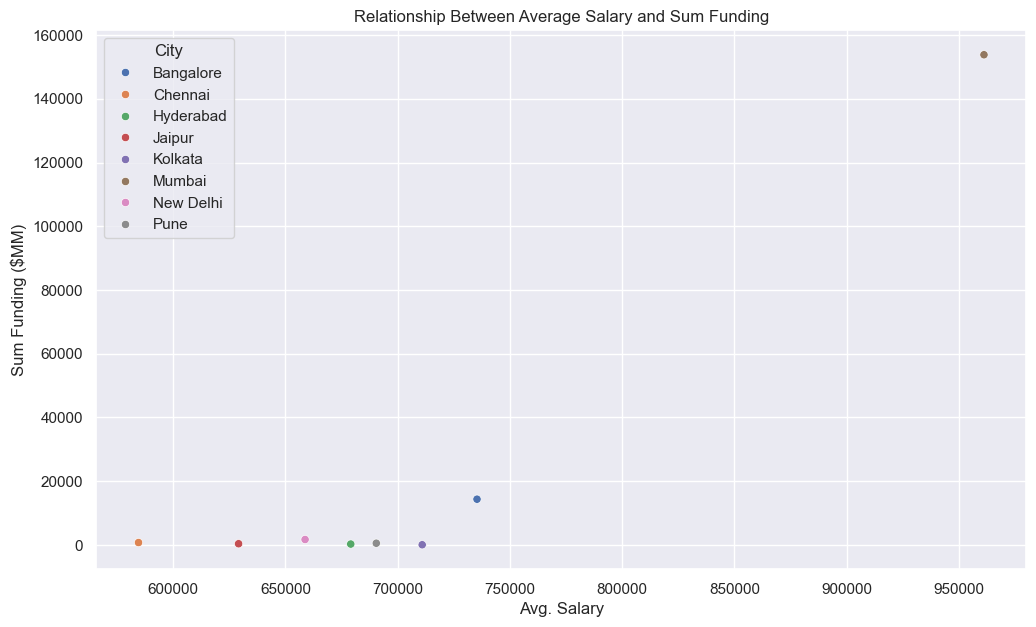

Mumbai stands out in terms of total funding received by companies and salary paid to their employees.


In [48]:
# scatterplot to show the relationship between Avg. Salary and Sum Funding ($MM)
# which city stands out in terms of total funding received by companies and salary paid to their employees?

sns.set_theme(rc={'figure.figsize':(12, 7)})
sns.scatterplot(x='Avg. Salary', y='Sum Funding ($MM)', data=sps_fnd_loc, hue='City').set(title='Relationship Between Average Salary and Sum Funding')
plt.show()

st_out = sps_fnd_loc.loc[sps_fnd_loc['Avg. Salary'] > 9e5]['City'].item()
print(f'{st_out} stands out in terms of total funding received by companies and salary paid to their employees.')